In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from google.colab import drive

In [ ]:
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/AP157/Datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data2023 = pd.read_csv(file_path + "2023 Season LoL Competitive Games.csv")

In [ ]:
patchdata2023 = raw_data2023[(raw_data2023["league"] == "LCK")]# | (raw_data2023["league"] == "LPL")| (raw_data2023["league"] == "LCS")| (raw_data2023["league"] == "LEC")]# | (raw_data2023["patch"] == 13.01)]
data2023 = patchdata2023[patchdata2023["position"]=="team"]

bluedata2023 = data2023[data2023["side"]=="Blue"]
reddata2023 = data2023[data2023["side"]=="Red"]

cols = np.arange(0,12)

bluedata2023.drop(bluedata2023.columns[cols], axis = 1,inplace=True)
bluedata2023.drop(bluedata2023.columns[-2], axis = 1,inplace=True)

reddata2023.drop(reddata2023.columns[cols], axis = 1,inplace=True)
reddata2023.drop(reddata2023.columns[[-2, -1]], axis = 1,inplace=True)

bluedata2023.rename(columns={"ban1": "blue_ban1",	"ban2":	"blue_ban2","ban3":"blue_ban3",	"ban4":"blue_ban4",	"ban5":"blue_ban5",
                             "pick1":"blue_pick1",	"pick2":"blue_pick2",	"pick3":"blue_pick3",	"pick4":"blue_pick4",	"pick5":"blue_pick5"}, inplace =True)

reddata2023.rename(columns={"ban1": "red_ban1",	"ban2":	"red_ban2","ban3":"red_ban3",	"ban4":"red_ban4",	"ban5":"red_ban5",
                             "pick1":"red_pick1",	"pick2":"red_pick2",	"pick3":"red_pick3",	"pick4":"red_pick4",	"pick5":"red_pick5"}, inplace =True)

<ipython-input-4-05d0343f4905>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bluedata2023.drop(bluedata2023.columns[cols], axis = 1,inplace=True)
<ipython-input-4-05d0343f4905>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bluedata2023.drop(bluedata2023.columns[-2], axis = 1,inplace=True)
<ipython-input-4-05d0343f4905>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddata2023.drop(reddata2023.columns[cols], axis = 1,inplace=

In [ ]:
rollassignment = patchdata2023["champion"].dropna()
playername = patchdata2023["playername"].dropna()
positions = ['blue_top', 'blue_jng', 'blue_mid', 'blue_bot', 'blue_sup', 'red_top', 'red_jng', 'red_mid', 'red_bot', 'red_sup']
playerpositions = ['blue_toplaner', 'blue_jngler', 'blue_midlaner', 'blue_botlaner', 'blue_support', 'red_toplaner', 'red_jngler', 'red_midlaner', 'red_botlaner', 'red_support']
rolls = pd.DataFrame(columns = positions)
players = pd.DataFrame(columns = playerpositions)
df_len = len(rollassignment)

In [ ]:
for row in np.arange(int(df_len/10)):
  for i, position in enumerate(positions):
    rolls.loc[row, position] = rollassignment.iloc[i+(row*10)]
for row in np.arange(int(df_len/10)):
  for i, position in enumerate(playerpositions):
    players.loc[row, position] = playername.iloc[i+(row*10)]
# display(rolls)

In [ ]:
# Reindex the array with new indices
bluedata2023 = bluedata2023.reset_index(drop=False)
reddata2023 = reddata2023.reset_index(drop=False)

In [ ]:
# Creating the main dataset
main_data = pd.concat([bluedata2023, reddata2023, players, rolls], axis=1)
main_data = main_data.drop(main_data.columns[0], axis=1)
column_to_move = 'result'
main_data = main_data[[col for col in main_data.columns if col != column_to_move] + [column_to_move]]

In [ ]:
display(main_data)

,blue_ban1,blue_ban2,blue_ban3,blue_ban4,blue_ban5,blue_pick1,blue_pick2,blue_pick3,blue_pick4,blue_pick5,...,blue_jng,blue_mid,blue_bot,blue_sup,red_top,red_jng,red_mid,red_bot,red_sup,result
0,Ashe,Sejuani,Twitch,Syndra,Renekton,Ryze,Lucian,Nami,Elise,Gnar,...,Elise,Ryze,Lucian,Nami,Jax,Maokai,Taliyah,Zeri,Yuumi,1
1,Ashe,Sejuani,Heimerdinger,Tryndamere,Renekton,Yuumi,Sivir,Gnar,Syndra,Lee Sin,...,Lee Sin,Syndra,Sivir,Yuumi,Jax,Maokai,Viktor,Zeri,Lulu,1
2,Maokai,Ryze,Ashe,Wukong,Kassadin,Nami,Lucian,Vi,Azir,Gnar,...,Vi,Azir,Lucian,Nami,K'Sante,Elise,Taliyah,Zeri,Lulu,1
3,Maokai,Elise,Ryze,Kassadin,K'Sante,Nami,Wukong,Lucian,Lissandra,Fiora,...,Wukong,Lissandra,Lucian,Nami,Jayce,Vi,Ahri,Zeri,Lulu,1
4,Vi,Ryze,Elise,Kassadin,Jayce,Ashe,Sejuani,Heimerdinger,Taliyah,Aatrox,...,Sejuani,Taliyah,Ashe,Heimerdinger,Gnar,Maokai,Sylas,Varus,Jhin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Alistar,Nautilus,Tristana,Taliyah,Aatrox,Neeko,Zeri,Lulu,Poppy,Gragas,...,Poppy,Neeko,Zeri,Lulu,Ryze,Rell,Ahri,Xayah,Rakan,0
484,Alistar,Rell,Tristana,Ahri,Jax,Xayah,Nocturne,Neeko,Lulu,Gnar,...,Nocturne,Neeko,Xayah,Lulu,Renekton,Poppy,Veigar,Zeri,Rakan,1
485,Xayah,Neeko,Azir,Lulu,Nautilus,Zeri,Sejuani,Rakan,Taliyah,Camille,...,Sejuani,Taliyah,Zeri,Rakan,Aatrox,Maokai,Jayce,Lucian,Nami,1
486,Tristana,Alistar,Nautilus,Taliyah,Jax,Maokai,Aphelios,Lulu,Ahri,K'Sante,...,Maokai,Ahri,Aphelios,Lulu,Aatrox,Sejuani,Sylas,Zeri,Blitzcrank,0


In [ ]:
display(f"Number of NaNs: {main_data.isnull().sum().sum()}")

'Number of NaNs: 4'

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
uniquevalues = main_data.stack().unique()
champ_dict = dict(zip(uniquevalues, range(len(uniquevalues))))

In [ ]:
display(main_data)

,blue_ban1,blue_ban2,blue_ban3,blue_ban4,blue_ban5,blue_pick1,blue_pick2,blue_pick3,blue_pick4,blue_pick5,...,blue_jng,blue_mid,blue_bot,blue_sup,red_top,red_jng,red_mid,red_bot,red_sup,result
0,Ashe,Sejuani,Twitch,Syndra,Renekton,Ryze,Lucian,Nami,Elise,Gnar,...,Elise,Ryze,Lucian,Nami,Jax,Maokai,Taliyah,Zeri,Yuumi,1
1,Ashe,Sejuani,Heimerdinger,Tryndamere,Renekton,Yuumi,Sivir,Gnar,Syndra,Lee Sin,...,Lee Sin,Syndra,Sivir,Yuumi,Jax,Maokai,Viktor,Zeri,Lulu,1
2,Maokai,Ryze,Ashe,Wukong,Kassadin,Nami,Lucian,Vi,Azir,Gnar,...,Vi,Azir,Lucian,Nami,K'Sante,Elise,Taliyah,Zeri,Lulu,1
3,Maokai,Elise,Ryze,Kassadin,K'Sante,Nami,Wukong,Lucian,Lissandra,Fiora,...,Wukong,Lissandra,Lucian,Nami,Jayce,Vi,Ahri,Zeri,Lulu,1
4,Vi,Ryze,Elise,Kassadin,Jayce,Ashe,Sejuani,Heimerdinger,Taliyah,Aatrox,...,Sejuani,Taliyah,Ashe,Heimerdinger,Gnar,Maokai,Sylas,Varus,Jhin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Alistar,Nautilus,Tristana,Taliyah,Aatrox,Neeko,Zeri,Lulu,Poppy,Gragas,...,Poppy,Neeko,Zeri,Lulu,Ryze,Rell,Ahri,Xayah,Rakan,0
484,Alistar,Rell,Tristana,Ahri,Jax,Xayah,Nocturne,Neeko,Lulu,Gnar,...,Nocturne,Neeko,Xayah,Lulu,Renekton,Poppy,Veigar,Zeri,Rakan,1
485,Xayah,Neeko,Azir,Lulu,Nautilus,Zeri,Sejuani,Rakan,Taliyah,Camille,...,Sejuani,Taliyah,Zeri,Rakan,Aatrox,Maokai,Jayce,Lucian,Nami,1
486,Tristana,Alistar,Nautilus,Taliyah,Jax,Maokai,Aphelios,Lulu,Ahri,K'Sante,...,Maokai,Ahri,Aphelios,Lulu,Aatrox,Sejuani,Sylas,Zeri,Blitzcrank,0


In [ ]:
# Encoding DataFrame
# for col in main_data.select_dtypes(include=['object']):
#   main_data[col] = main_data[col].replace(champ_dict)
#   main_data[col].astype(float)

# display(main_data)

In [ ]:
display(f"Number of NaNs: {main_data.isnull().sum()}")

'Number of NaNs: blue_ban1        0\nblue_ban2        0\nblue_ban3        1\nblue_ban4        0\nblue_ban5        2\nblue_pick1       0\nblue_pick2       0\nblue_pick3       0\nblue_pick4       0\nblue_pick5       0\nred_ban1         0\nred_ban2         0\nred_ban3         0\nred_ban4         0\nred_ban5         1\nred_pick1        0\nred_pick2        0\nred_pick3        0\nred_pick4        0\nred_pick5        0\nblue_toplaner    0\nblue_jngler      0\nblue_midlaner    0\nblue_botlaner    0\nblue_support     0\nred_toplaner     0\nred_jngler       0\nred_midlaner     0\nred_botlaner     0\nred_support      0\nblue_top         0\nblue_jng         0\nblue_mid         0\nblue_bot         0\nblue_sup         0\nred_top          0\nred_jng          0\nred_mid          0\nred_bot          0\nred_sup          0\nresult           0\ndtype: int64'

In [ ]:
from sklearn.preprocessing import LabelEncoder



# Replace values in the 'blue_ban' column using the dictionary
encoders = {}

# Loop through columns to encode
for col in main_data.select_dtypes(include=['object']):
  # Create a LabelEncoder instance
  encoder = LabelEncoder()
  # Fit the encoder on the current column and transform
  main_data[col] = encoder.fit_transform(main_data[col])
  # Store the encoder for future reference (optional)
  encoders[col] = encoder

In [ ]:
display(main_data)

,blue_ban1,blue_ban2,blue_ban3,blue_ban4,blue_ban5,blue_pick1,blue_pick2,blue_pick3,blue_pick4,blue_pick5,...,blue_jng,blue_mid,blue_bot,blue_sup,red_top,red_jng,red_mid,red_bot,red_sup,result
0,5,38,46,60,52,27,26,35,13,16,...,0,18,9,20,12,9,24,21,28,1
1,5,38,14,64,52,34,43,13,68,35,...,5,22,12,33,12,9,28,21,11,1
2,23,37,5,71,31,20,26,61,7,16,...,18,4,9,20,14,1,24,21,11,1
3,23,11,41,27,27,20,51,30,42,13,...,21,15,9,20,13,21,0,21,11,1
4,39,37,10,27,25,3,42,15,70,0,...,15,23,1,9,7,9,22,18,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,3,28,45,61,0,21,54,31,52,17,...,12,16,16,15,25,16,0,20,19,0
484,3,34,45,1,24,33,34,37,44,16,...,11,16,15,15,23,15,27,21,19,1
485,42,29,6,36,43,35,42,43,70,10,...,15,23,16,22,0,9,10,11,15,1
486,36,3,33,61,24,18,5,31,1,27,...,7,0,0,15,0,18,22,21,3,0


## Setting Features and Targets

In [ ]:
features = main_data.iloc[:,0:-1]
targets = main_data.iloc[:,-1]

# Feature Correlation

In [ ]:
image_path = "/content/drive/My Drive/AP157/Images/"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

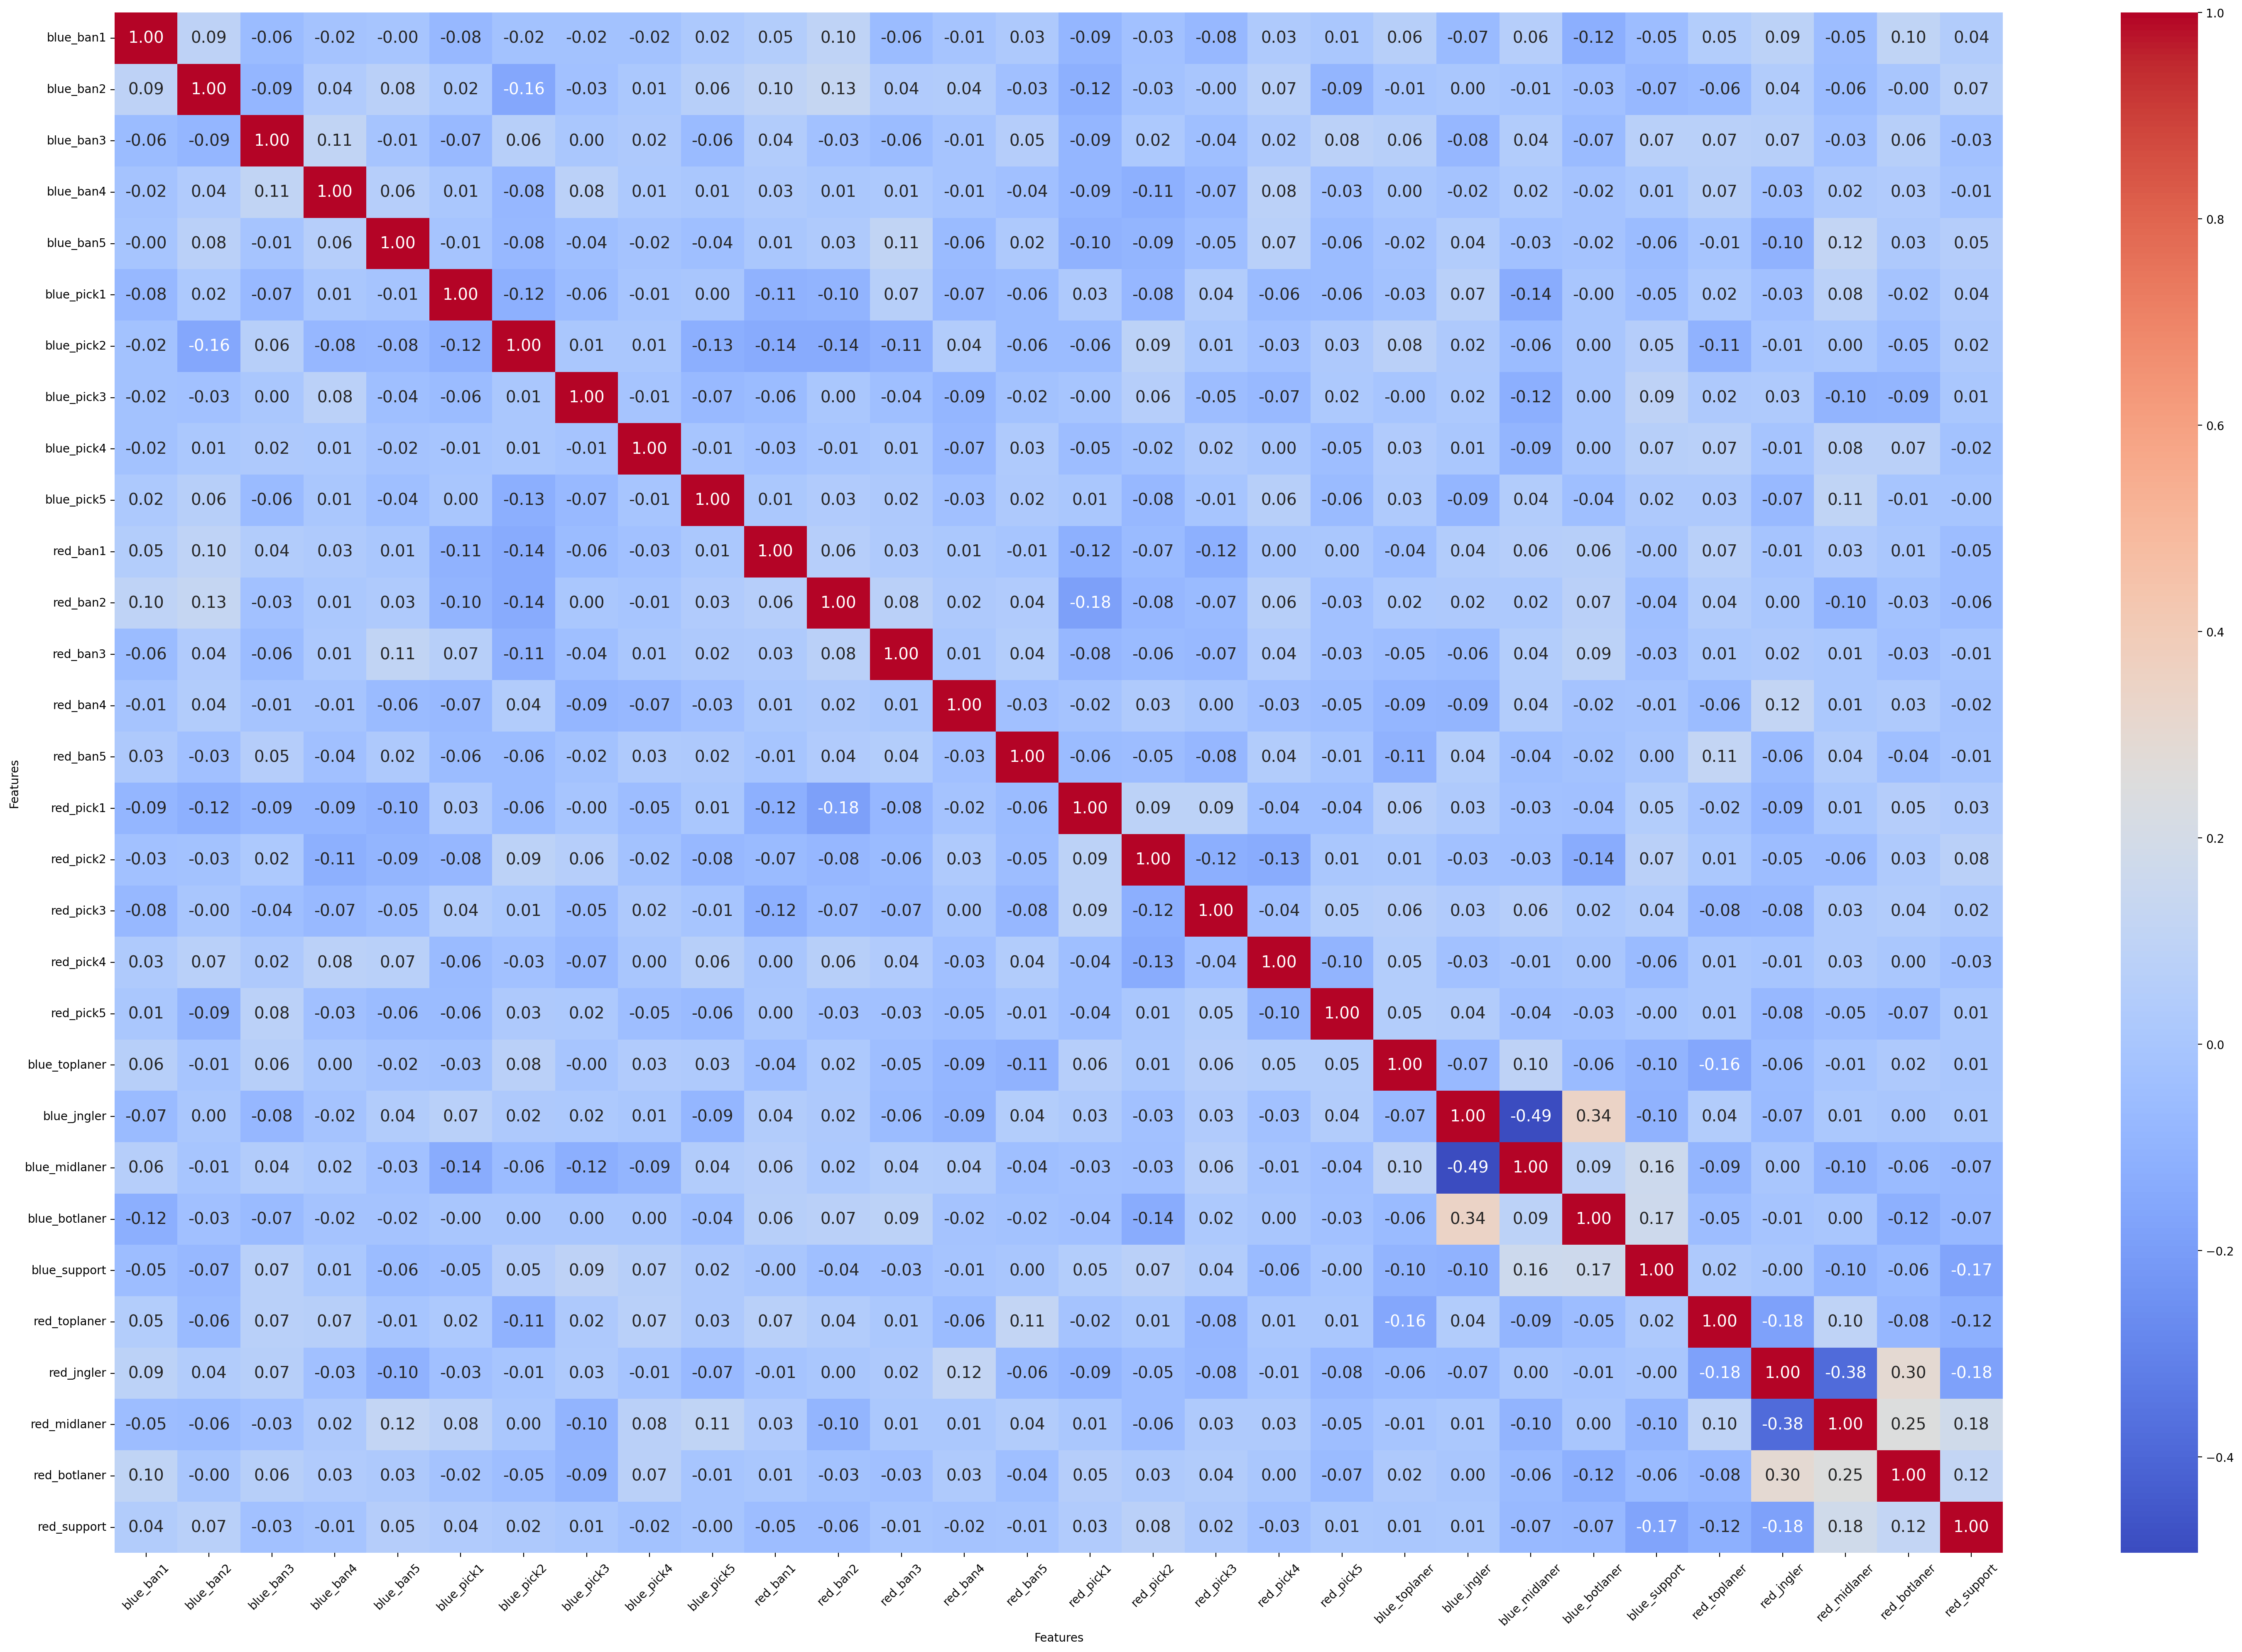

In [ ]:
correlation_matrix =  features.iloc[:,0:-10].corr()
# Create a new figure for plotting
fig = plt.figure(figsize=(30, 20), dpi = 200)
minimum = np.min(correlation_matrix)
# Create heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14}, vmin = minimum, vmax = 1)  # Adjust 'cmap' for different color schemes

# Add labels for better readability
plt.xlabel('Features')
plt.ylabel('Features')

# Rotate x-axis labels for better visibility with many features
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
fig.savefig(image_path+"Total Correlation Matrix.png", dpi = 500)

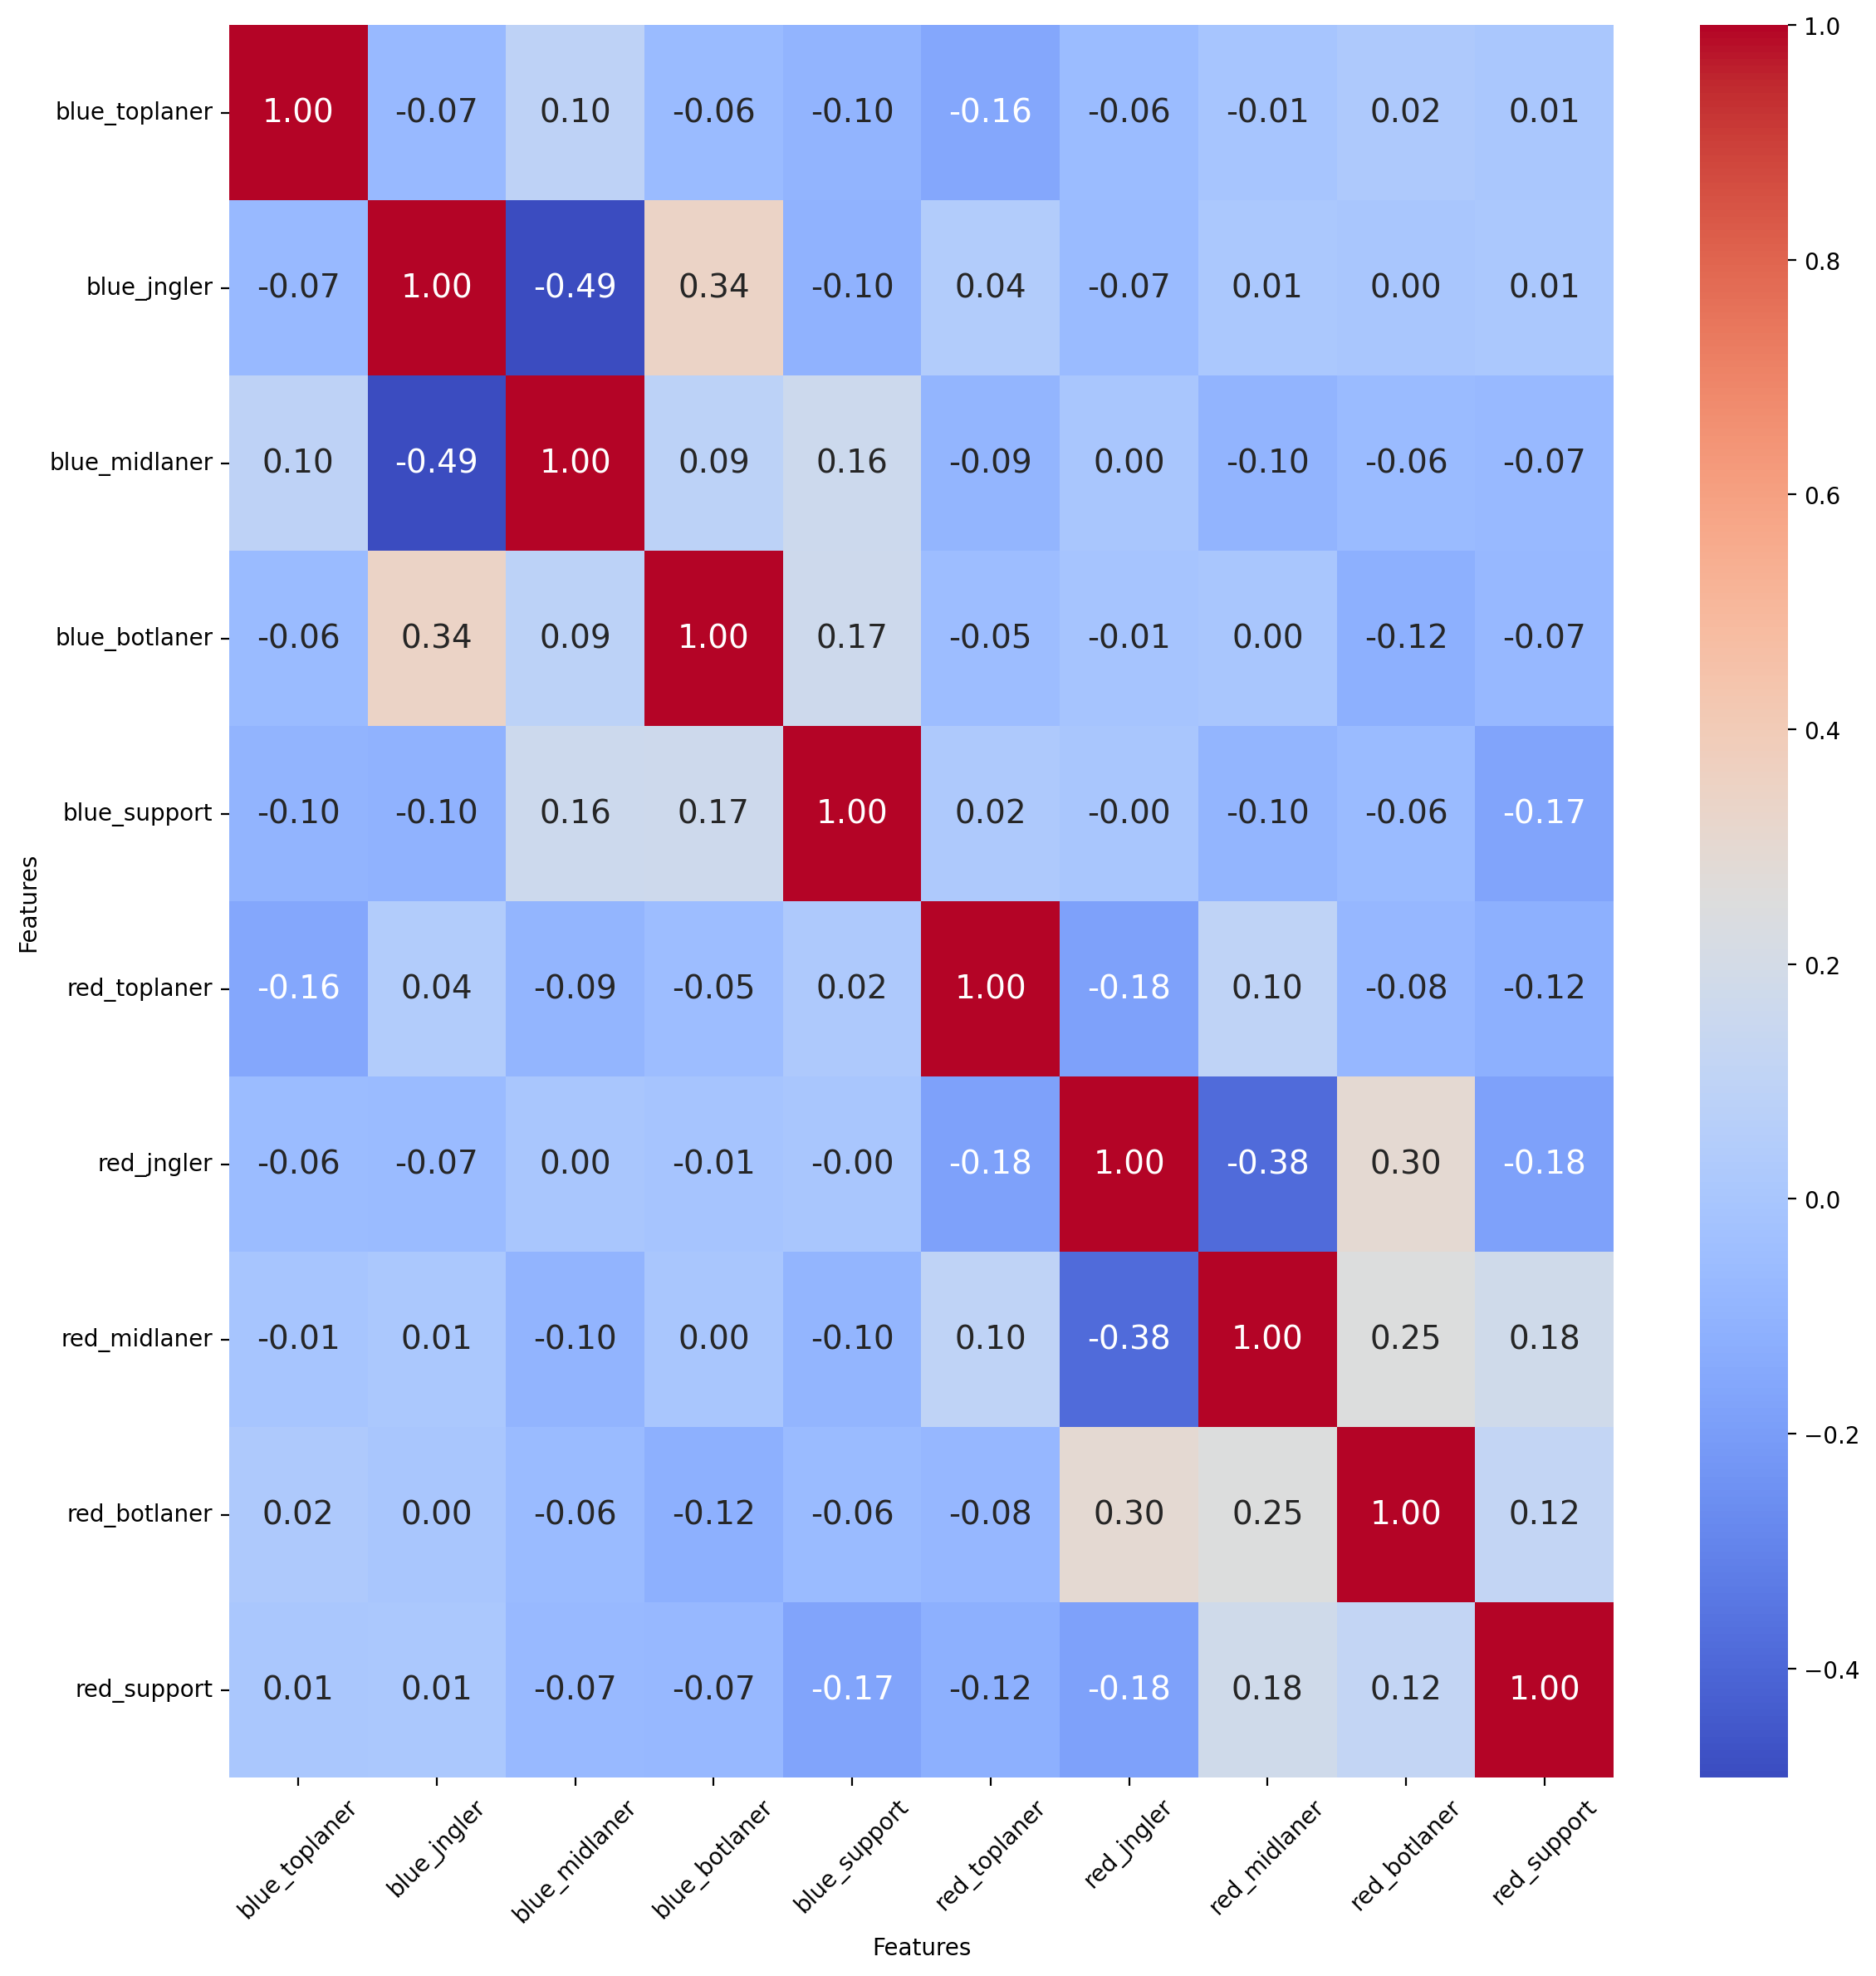

In [ ]:
#correlation_matrix =  features.iloc[:,0:-10].corr()
# Create a new figure for plotting
fig = plt.figure(figsize=(12, 12), dpi = 200)

# Create heatmap with annotations
row_start = 20  # Starting row index (inclusive) - refers to the second row (index 1)
col_start = 20  # Starting column index (inclusive) - refers to the first column (index 0)
num_rows = 10  # Number of rows to include
num_cols = 10
submatrix = correlation_matrix.iloc[row_start:row_start+num_rows, col_start:col_start+num_cols]
sns.heatmap(submatrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14}, vmin = minimum, vmax = 1)  # Adjust 'cmap' for different color schemes

# Add labels for better readability
plt.xlabel('Features')
plt.ylabel('Features')

# Rotate x-axis labels for better visibility with many features
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
fig.savefig(image_path+"Roll Assignment Correlation Sub Matrix.png", dpi = 500)

# Training Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# def train_model(features,targets):
def train_model(features,targets = targets):
  X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
  RF_classifier = RandomForestClassifier(random_state=42, n_estimators = 10000, bootstrap=True, oob_score = True)
  RF_classifier.fit(X_train, Y_train)
  predicted_y = RF_classifier.predict(X_test)
  actual_class = Y_test.to_numpy()
  matches = predicted_y == actual_class #boolean conditioning to determine the correctly labeled objects by matching the predicted and actual classes
  accuracy = matches.sum()/predicted_y.shape #the number of correctly matched divided by the number of predictions done
  print(f"Accuracy of the model: {accuracy}")
  class_report = classification_report(Y_test, predicted_y, output_dict=True)
  conf_matrix = confusion_matrix(Y_test, predicted_y)
  # return accuracy, RF_classifier
  return accuracy, class_report,conf_matrix, RF_classifier
  # return accuracy, oob, mean_cv, class_report,conf_matrix, RF_classifier

In [ ]:
features_set2 = features.iloc[:,0:21]
features_set3 = features.iloc[:,21:]

In [ ]:
accuracy_set1, class_report_set1,conf_matrix_set1, RF_classifier_set1 = train_model(features)
accuracy_set1, class_report_set2,conf_matrix_set2, RF_classifier_set2 = train_model(features_set2)
accuracy_set1, class_report_set3,conf_matrix_set3, RF_classifier_set3 = train_model(features_set3)

Accuracy of the model: [0.64285714]
Accuracy of the model: [0.56122449]
Accuracy of the model: [0.68367347]


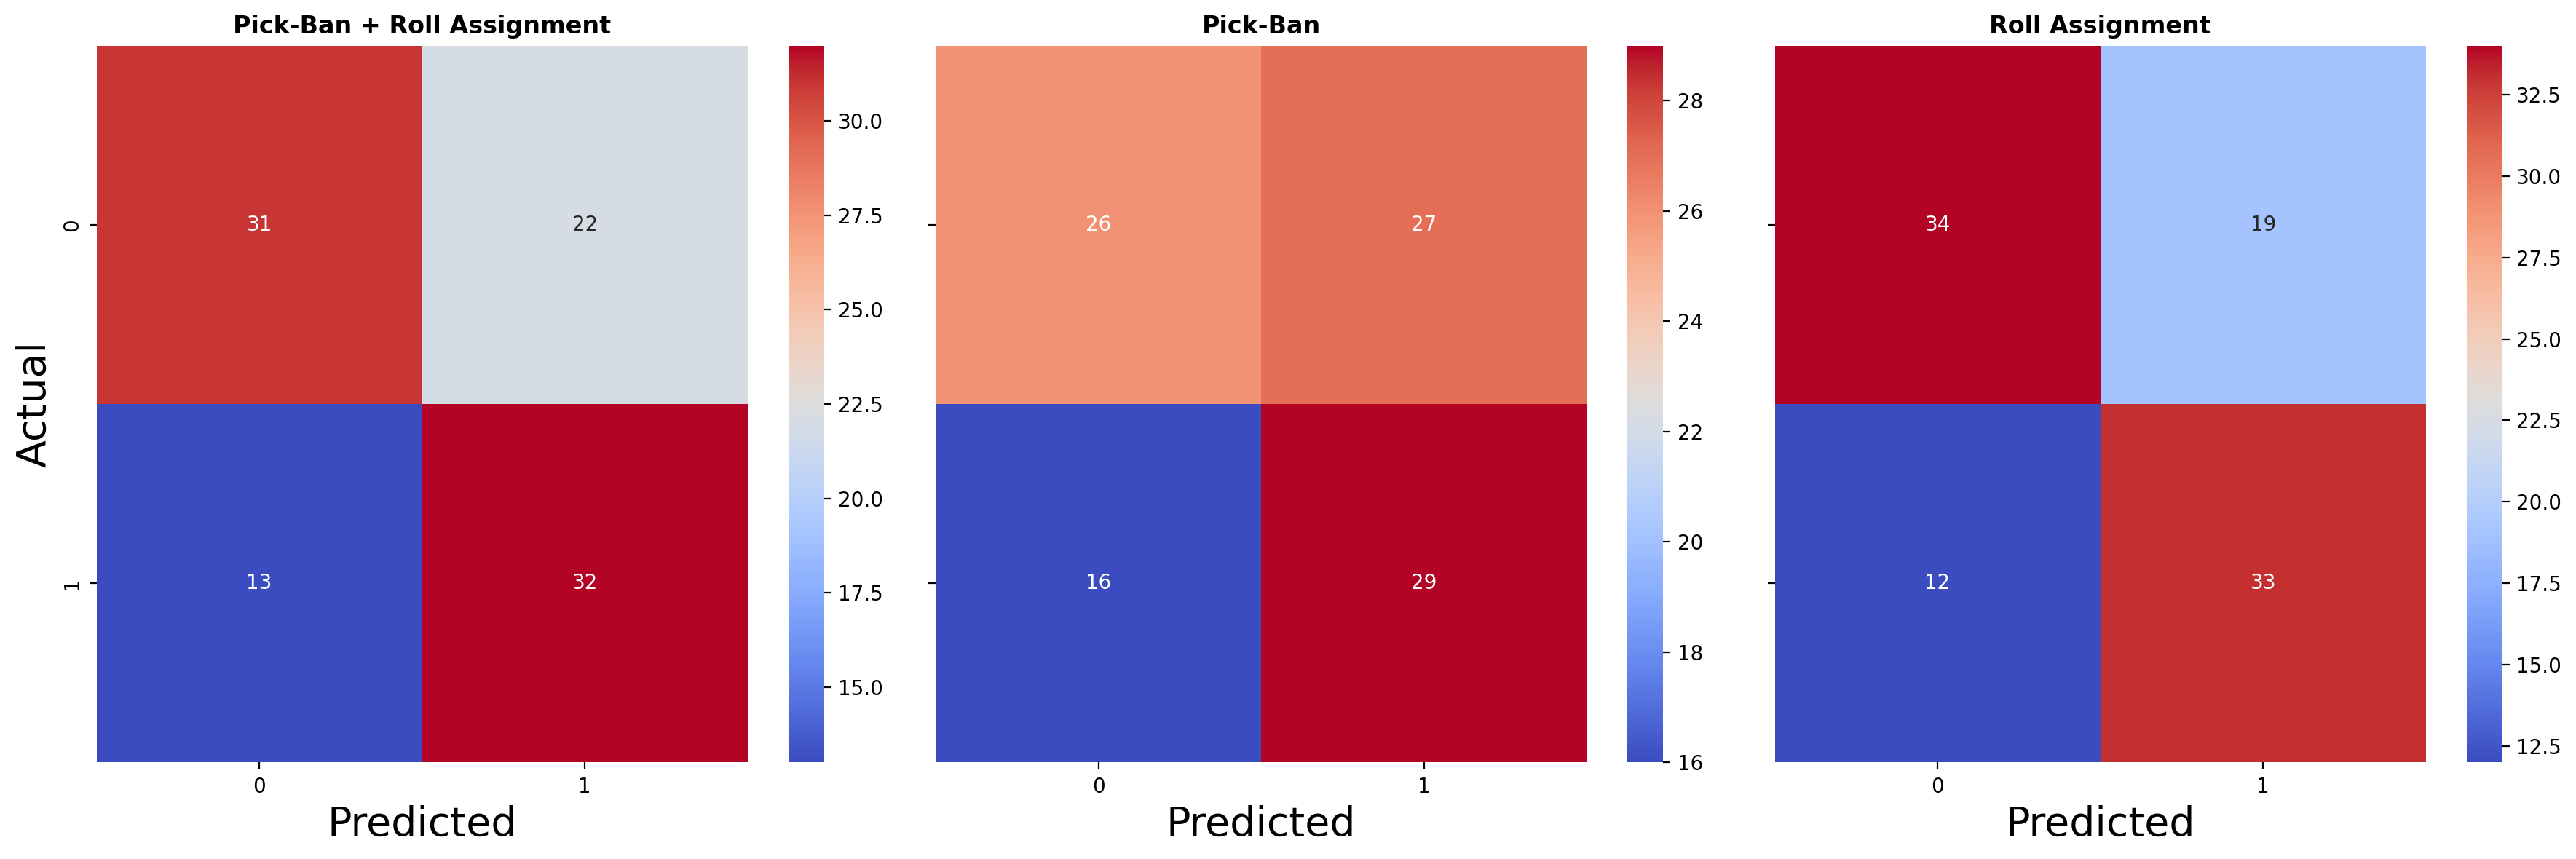

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey = True, dpi = 200)
fontsize = 20

sns.heatmap(conf_matrix_set1, annot=True, fmt='d', cmap="coolwarm", ax=axes[0])#, annot_kws={"size": 22})
axes[0].set_title('Pick-Ban + Roll Assignment', fontweight = 'bold')
axes[0].set_xlabel('Predicted', fontsize = fontsize)
axes[0].set_ylabel('Actual', fontsize = fontsize)

sns.heatmap(conf_matrix_set2, annot=True, fmt='d', cmap="coolwarm", ax=axes[1])#, annot_kws={"size": 22})
axes[1].set_title('Pick-Ban', fontweight = 'bold')
axes[1].set_xlabel('Predicted', fontsize = fontsize)
#axes[1].set_ylabel('Actual', fontsize = fontsize)

sns.heatmap(conf_matrix_set3, annot=True, fmt='d', cmap="coolwarm", ax=axes[2])#, annot_kws={"size": 22})
axes[2].set_title('Roll Assignment', fontweight = 'bold')
axes[2].set_xlabel('Predicted', fontsize = fontsize)
#axes[2].set_ylabel('Actual', fontsize = fontsize)

#plt.yticks(fontsize = '16')

plt.tight_layout()
plt.savefig(image_path + 'ConfusionMatrix.jpg', dpi = 500)
plt.show()

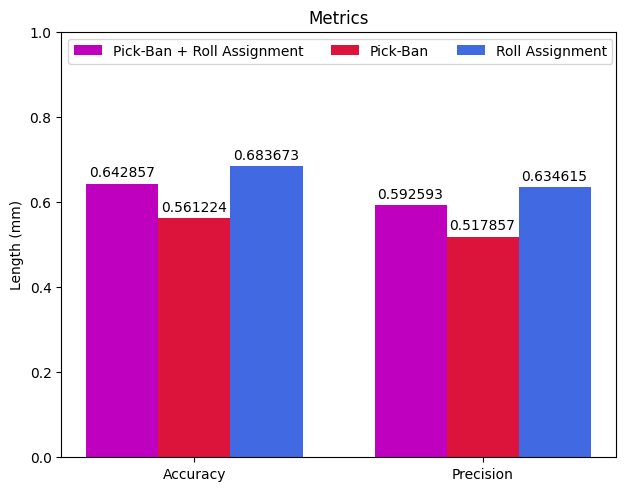

<Figure size 640x480 with 0 Axes>

In [ ]:
precision_class1 = class_report_set1['1']['precision']
accuracy_class1 = class_report_set1['accuracy']

precision_class2 = class_report_set2['1']['precision']
accuracy_class2 = class_report_set2['accuracy']

precision_class3 = class_report_set3['1']['precision']
accuracy_class3 = class_report_set3['accuracy']

label = ("Accuracy", "Precision")
colors = ['m', 'crimson', 'royalblue']

metrics = {
    'Pick-Ban + Roll Assignment': (accuracy_class1, precision_class1),
    'Pick-Ban': (accuracy_class2, precision_class2),
    'Roll Assignment': (accuracy_class3, precision_class3),
}

x = np.arange(len(label))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Metrics')
ax.set_xticks(x + width, label)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

plt.tight_layout()
fig.savefig(image_path + 'Accuracy_Precision.jpg', dpi = 500)
plt.show()

# accuracies.append(accuracy)

# Confusion Matrix

#Feature Importance

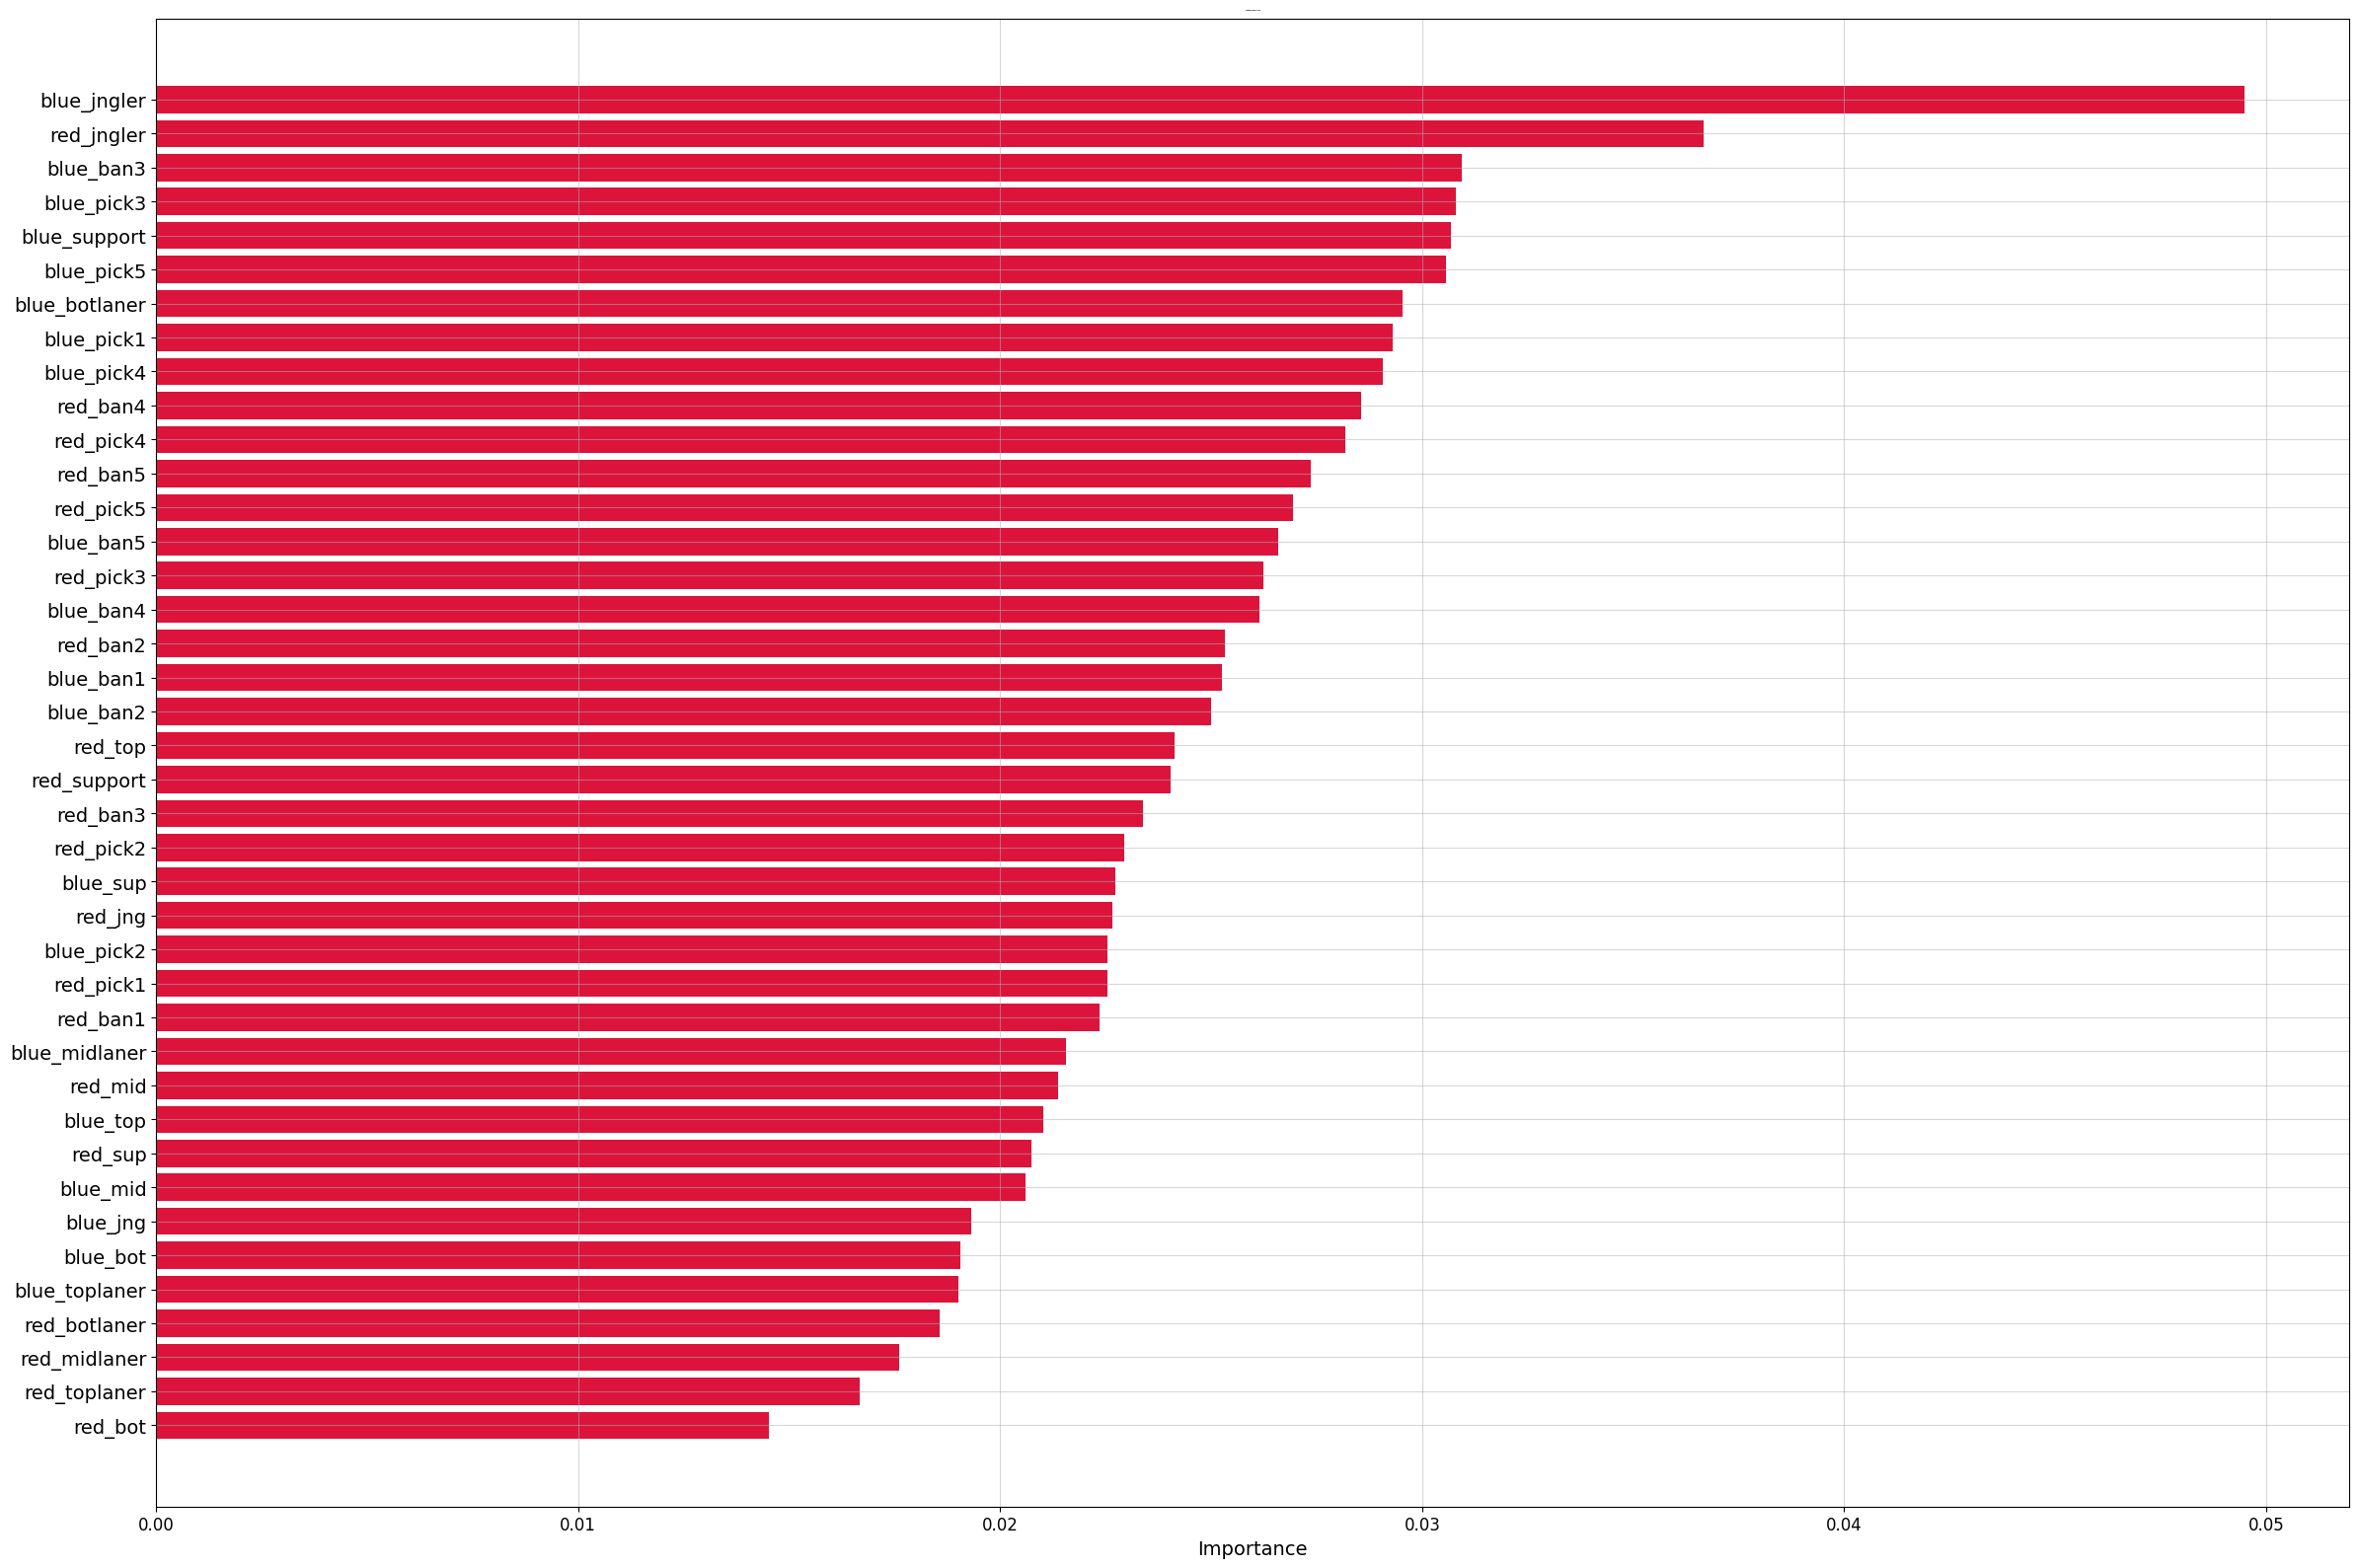

In [ ]:
importances = RF_classifier_set1.feature_importances_
indices = np.argsort(importances)
features = main_data.columns

#Plotting
plt.figure(figsize=(24, 16))
plt.title('Feature Importance', fontweight='bold', fontsize='1')
plt.barh(range(len(indices)), importances[indices], color='crimson', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = '14')
plt.xticks(fontsize = '12')
plt.xlabel('Importance', fontsize = '14')
plt.grid(alpha = 0.5)

# for i, v in enumerate(importances[indices]):
#     plt.text(v-0.012, i, f'{v:.2f}', color='white', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(image_path + 'Important_Features.jpg', dpi = 500)
plt.show()

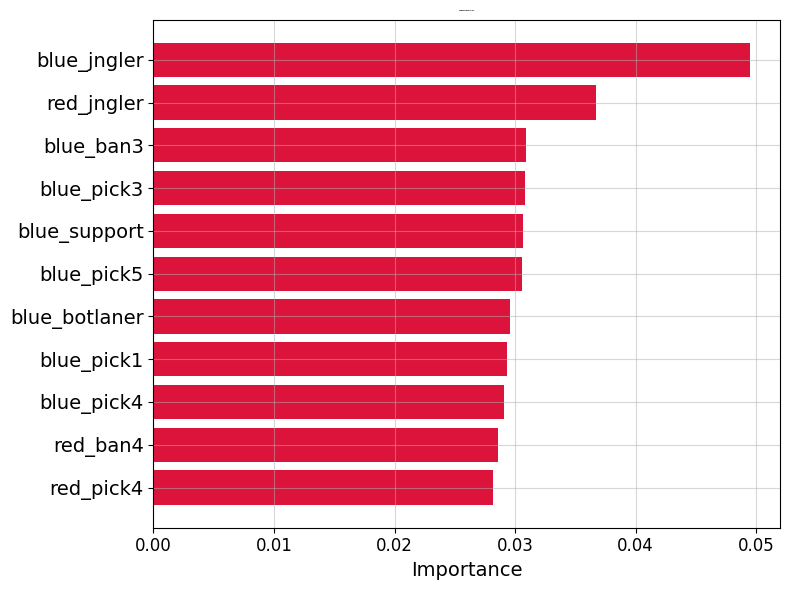

In [ ]:
used_indices = indices[-11:]
features = main_data.columns

#Plotting
plt.figure(figsize=(8, 6))
plt.title('Feature Importance', fontweight='bold', fontsize='1')
plt.barh(range(len(used_indices)), importances[used_indices], color='crimson', align='center')

plt.yticks(range(len(used_indices)), [features[i] for i in used_indices], fontsize = '14')
plt.xticks(fontsize = '12')
plt.xlabel('Importance', fontsize = '14')
plt.grid(alpha = 0.5)

# for i, v in enumerate(importances[indices]):
#     plt.text(v-0.012, i, f'{v:.2f}', color='white', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(image_path + 'Most_Important_Features.jpg', dpi = 500)
plt.show()

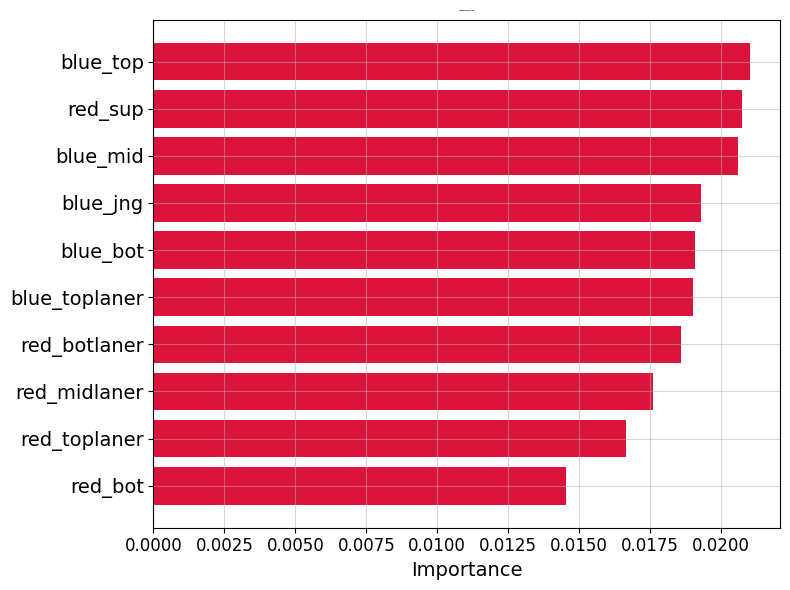

In [ ]:
used_indices = indices[0:10]
features = main_data.columns

#Plotting
plt.figure(figsize=(8, 6))
plt.title('Feature Importance', fontweight='bold', fontsize='1')
plt.barh(range(len(used_indices)), importances[used_indices], color='crimson', align='center')

plt.yticks(range(len(used_indices)), [features[i] for i in used_indices], fontsize = '14')
plt.xticks(fontsize = '12')
plt.xlabel('Importance', fontsize = '14')
plt.grid(alpha = 0.5)

# for i, v in enumerate(importances[indices]):
#     plt.text(v-0.012, i, f'{v:.2f}', color='white', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(image_path + 'Least_Important_Features.jpg', dpi = 500)
plt.show()